In [1]:
from src import Modeler, Processor, Reader
import pandas as pd
from datetime import datetime
from sklearn import metrics, model_selection, preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
import numpy as np

# Plotting
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()

In [2]:
# Using the US Census regions from here: https://www2.census.gov/geo/pdfs/maps-data/maps/reference/us_regdiv.pdf
south_atlantic_states = [
    10   # Delaware
    , 11 # DC
    , 12 # Florida
    , 13 # Georgia
    , 24 # Maryland
    , 37 # North Carolina
    , 45 # South Carolina
    , 51 # Virginia
    , 54 # West Virginia
]
state_filter = south_atlantic_states

In [3]:
state_dict = {
    'code' : ['10', '11', '12', '13', '24', '37', '45', '51', '54']
    , 'state_name' : ['Delware', 'DC', 'Florida', 'Georgia', 'Maryland', 'North Carolina', 'South Carolina', 'Virginia', 'West Virginia']
}

state_code_map = pd.DataFrame(data=state_dict)

## Cases and Deaths Data

In [4]:
cd_reader = Reader.CasesAndDeathsReader()

In [5]:
cd_df = cd_reader.read_and_process_data(state_filter=state_filter)

In [6]:
cd_df.head()

,FIPS,date,cases,deaths,previous_day_cases,new_cases,smoothed_new_cases,8_days_prior_cases,9_days_prior_cases,10_days_prior_cases,previous_day_deaths,new_deaths,smoothed_new_deaths,8_days_prior_deaths,9_days_prior_deaths,10_days_prior_deaths
0,10001,2020-03-18,3,0.0,0.0,3.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0
1,10001,2020-03-19,4,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10001,2020-03-20,4,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,10001,2020-03-21,5,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,10001,2020-03-22,5,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
cd_df_fl = cd_df[cd_df['FIPS'].apply(lambda x: x[:2] == 12)]

## Aggregating by state

In [30]:
cd_df.head()

,FIPS,date,cases,deaths,previous_day_cases,new_cases,smoothed_new_cases,8_days_prior_cases,9_days_prior_cases,10_days_prior_cases,previous_day_deaths,new_deaths,smoothed_new_deaths,8_days_prior_deaths,9_days_prior_deaths,10_days_prior_deaths
0,10001,2020-03-18,3,0.0,0.0,3.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0
1,10001,2020-03-19,4,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10001,2020-03-20,4,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,10001,2020-03-21,5,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,10001,2020-03-22,5,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
state_df = cd_df.copy()
state_df['STATE'] = state_df['FIPS'].apply(lambda x: x[:2])
state_df = state_df.drop(['FIPS'], axis=1).groupby(['date', 'STATE']).sum().reset_index()
state_df.head()

,date,STATE,cases,deaths,previous_day_cases,new_cases,smoothed_new_cases,8_days_prior_cases,9_days_prior_cases,10_days_prior_cases,previous_day_deaths,new_deaths,smoothed_new_deaths,8_days_prior_deaths,9_days_prior_deaths,10_days_prior_deaths
0,2020-03-01,12,2,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-03-02,12,2,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-03-02,13,2,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-03-03,12,3,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-03-03,13,2,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


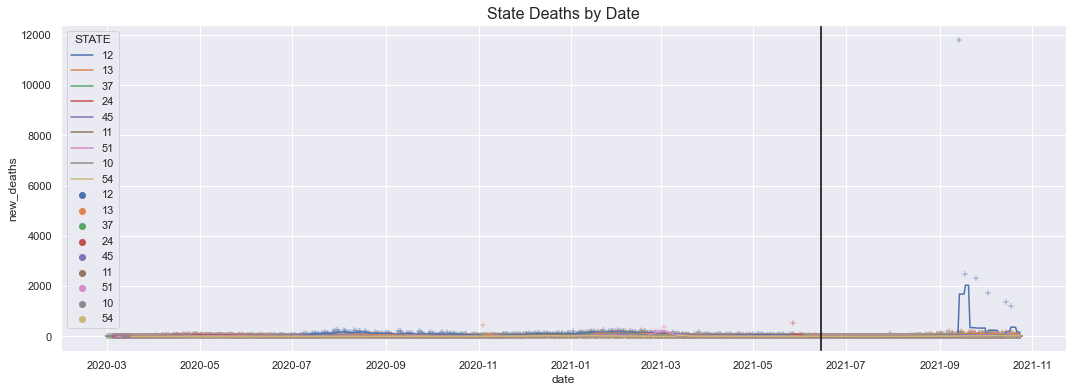

In [32]:
plt.figure(figsize=(18, 6))
sns.scatterplot(x='date', y='new_deaths', hue='STATE', data=state_df, marker='+');
sns.lineplot(x='date', y='smoothed_new_deaths',hue='STATE', data=state_df);
plt.axvline(x=datetime.strptime('2021-06-15', '%Y-%m-%d'), color='black')
plt.title('State Deaths by Date', fontsize=16);
plt.show()

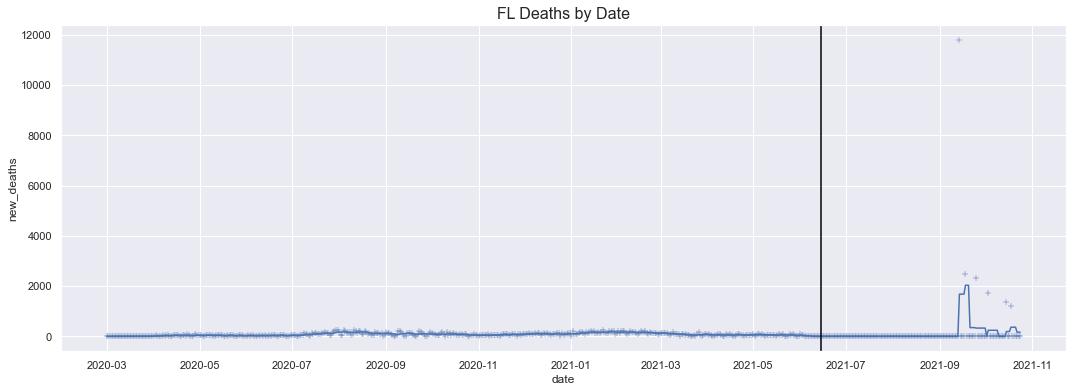

In [33]:
plt.figure(figsize=(18, 6))
sns.scatterplot(x='date', y='new_deaths', data=state_df[state_df['STATE'] == '12'], marker='+');
sns.lineplot(x='date', y='smoothed_new_deaths', data=state_df[state_df['STATE'] == '12']);
plt.axvline(x=datetime.strptime('2021-06-15', '%Y-%m-%d'), color='black')
plt.title('FL Deaths by Date', fontsize=16);
plt.show()

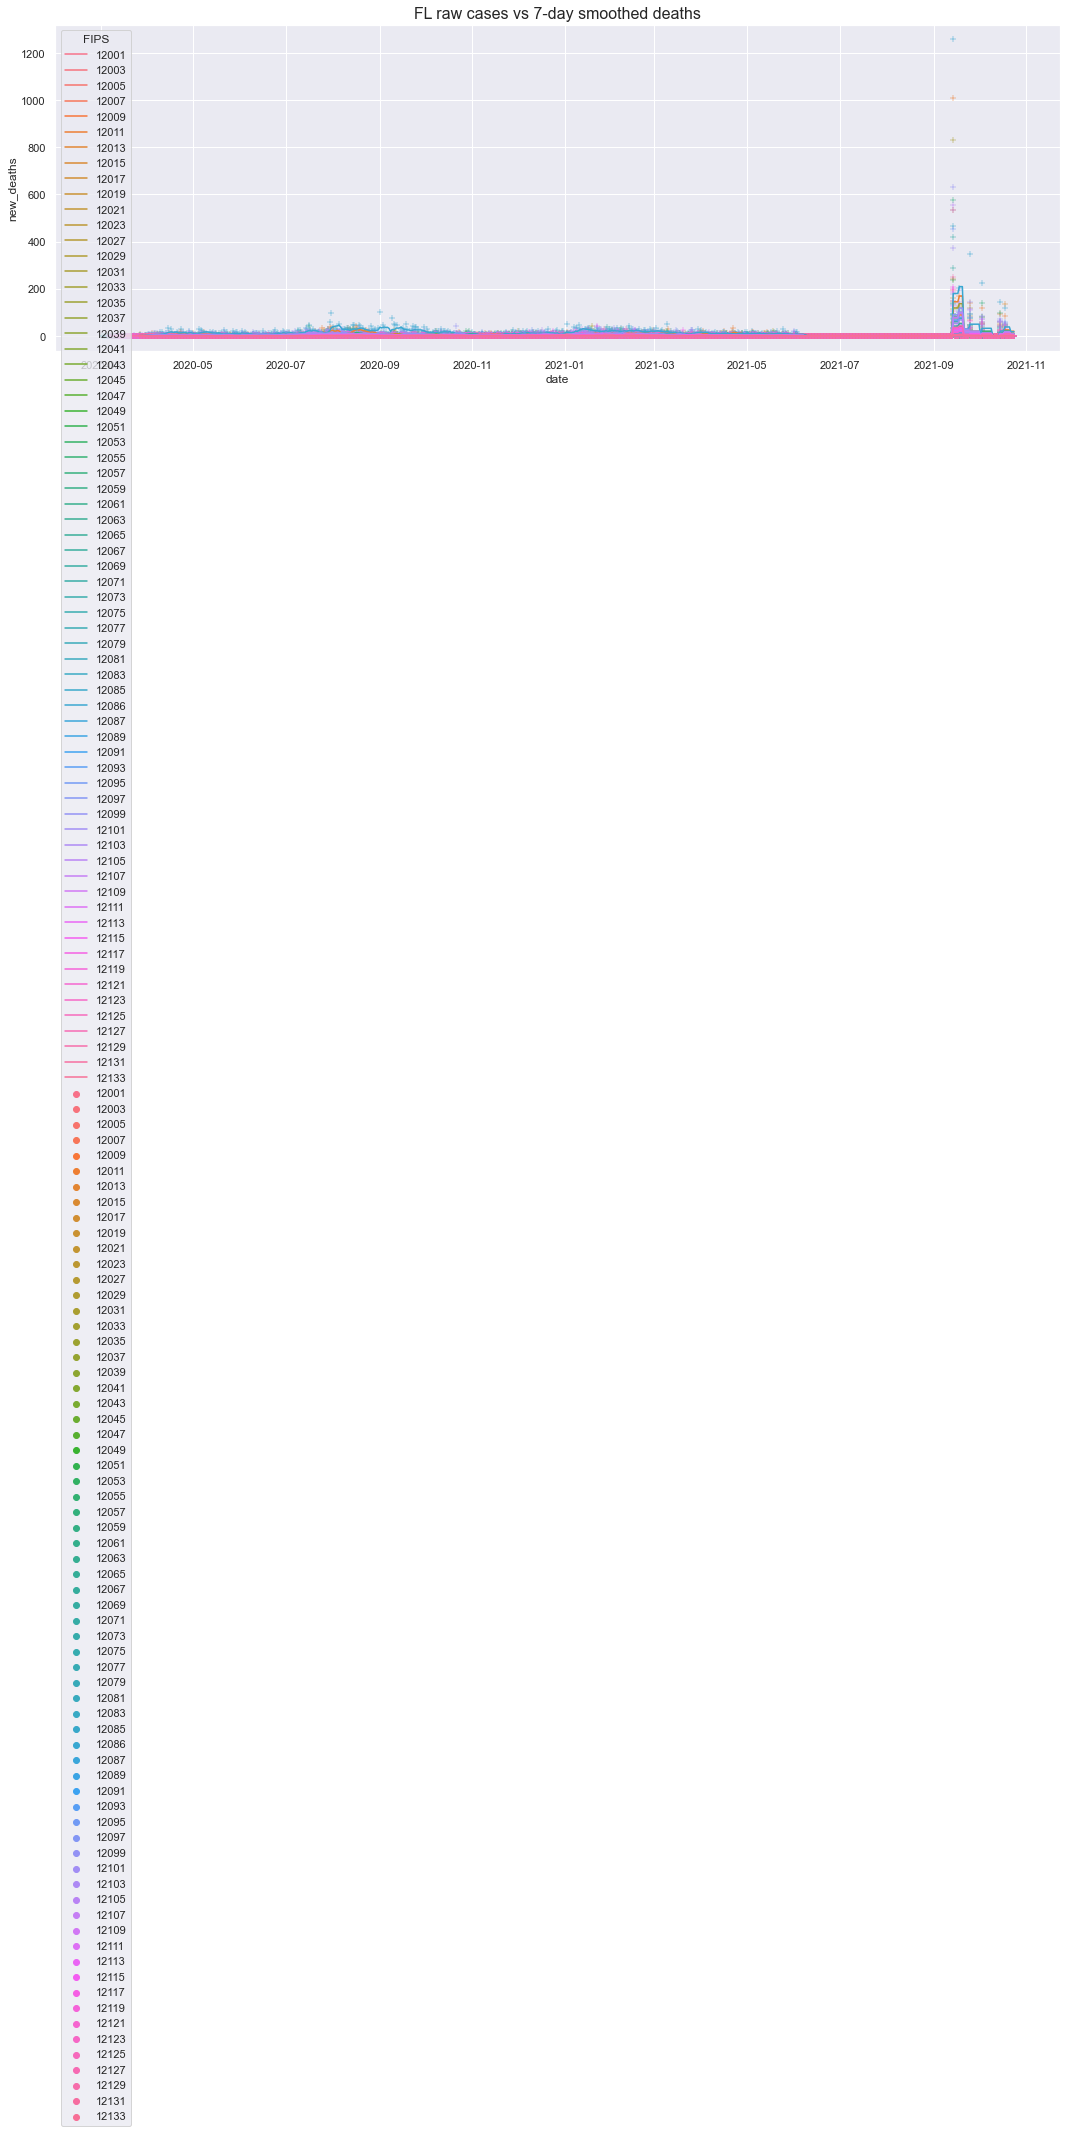

In [34]:
cd_only_fl = cd_df[(cd_df['FIPS'].apply(lambda x: x[:2] == '12'))]
plt.figure(figsize=(18, 6))
sns.scatterplot(x='date', y='new_deaths', data=cd_only_fl, hue='FIPS', marker='+');
sns.lineplot(x='date', y='smoothed_new_deaths', data=cd_only_fl, hue='FIPS');
plt.title('FL raw cases vs 7-day smoothed deaths', fontsize=16);
plt.show()


In [35]:
cd_only_fl[cd_only_fl['new_deaths'] > 1000]

,FIPS,date,cases,deaths,previous_day_cases,new_cases,smoothed_new_cases,8_days_prior_cases,9_days_prior_cases,10_days_prior_cases,previous_day_deaths,new_deaths,smoothed_new_deaths,8_days_prior_deaths,9_days_prior_deaths,10_days_prior_deaths
5855,12011,2021-09-14,336741,4090.0,336741.0,0.0,1008.428571,1263.571429,1263.571429,1263.571429,3079.0,1011.0,144.428571,0.0,0.0,0.0
27369,12086,2021-09-14,642199,7730.0,642199.0,0.0,1374.285714,1725.714286,1725.714286,1725.714286,6472.0,1258.0,179.714286,0.0,0.0,0.0


In [36]:
date_mask = (cd_only_fl['date'] > '2021-09-01') & (cd_only_fl['date'] < '2021-09-25')
cd_only_fl[date_mask & (cd_only_fl['FIPS'] == '12011')][['FIPS','date', 'deaths', 'previous_day_deaths', 'new_deaths', 'smoothed_new_deaths']].head(20)

,FIPS,date,deaths,previous_day_deaths,new_deaths,smoothed_new_deaths
5843,12011,2021-09-02,3079.0,3079.0,0.0,0.000000
5844,12011,2021-09-03,3079.0,3079.0,0.0,0.000000
5845,12011,2021-09-04,3079.0,3079.0,0.0,0.000000
5846,12011,2021-09-05,3079.0,3079.0,0.0,0.000000
5847,12011,2021-09-06,3079.0,3079.0,0.0,0.000000
5848,12011,2021-09-07,3079.0,3079.0,0.0,0.000000
5849,12011,2021-09-08,3079.0,3079.0,0.0,0.000000
5850,12011,2021-09-09,3079.0,3079.0,0.0,0.000000
5851,12011,2021-09-10,3079.0,3079.0,0.0,0.000000
5852,12011,2021-09-11,3079.0,3079.0,0.0,0.000000


## Raw data

In [21]:
raw_df = pd.read_csv('../ny-times-git-repo/us-counties.csv', dtype={'fips':str})
raw_df['date'] = raw_df['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

In [22]:
raw_df.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061,1,0.0
1,2020-01-22,Snohomish,Washington,53061,1,0.0
2,2020-01-23,Snohomish,Washington,53061,1,0.0
3,2020-01-24,Cook,Illinois,17031,1,0.0
4,2020-01-24,Snohomish,Washington,53061,1,0.0


In [23]:
raw_df.dtypes

date      datetime64[ns]
county            object
state             object
fips              object
cases              int64
deaths           float64
dtype: object

In [24]:
na_df = raw_df[raw_df['fips'].isna()]
fl_na_df = na_df[na_df['state'] == 'Florida']

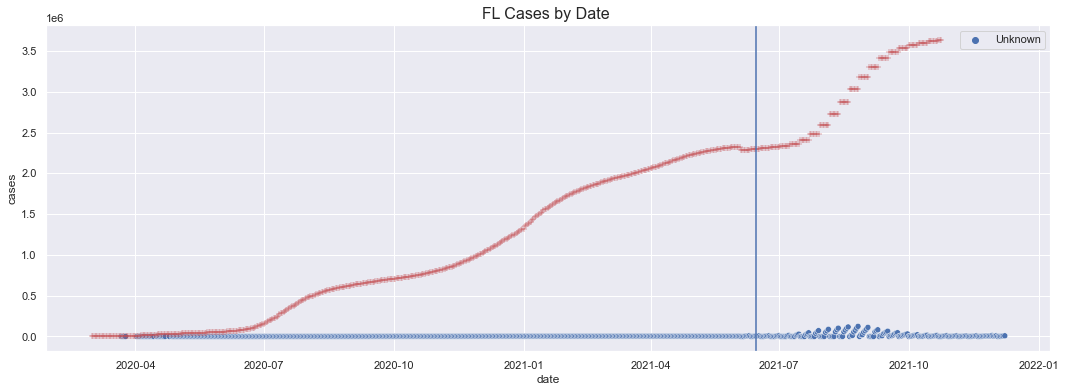

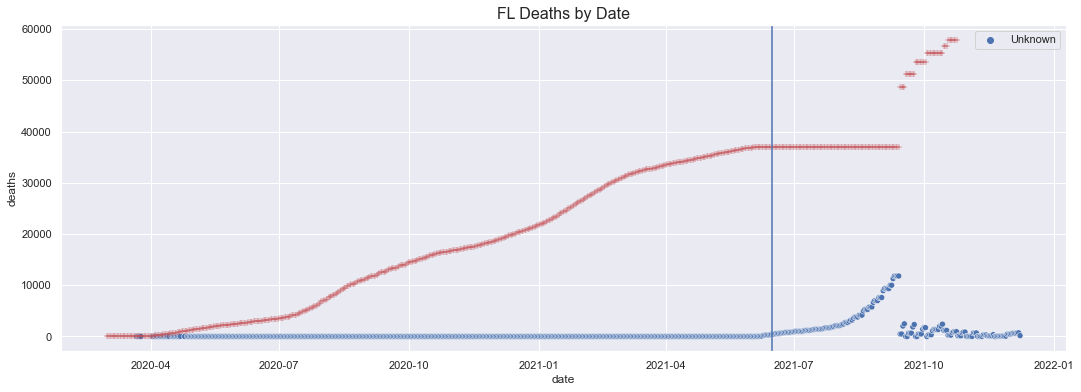

In [37]:
plt.figure(figsize=(18, 6))
sns.scatterplot(x='date', y='cases', hue='county', data=fl_na_df);
sns.scatterplot(x='date', y='cases', data=state_df[state_df['STATE'] == '12'], marker='+', color='r');
plt.title('FL Cases by Date ', fontsize=16);
plt.axvline(x=datetime.strptime('2021-06-15', '%Y-%m-%d'))
plt.show()
plt.figure(figsize=(18, 6))
sns.scatterplot(x='date', y='deaths', hue='county', data=fl_na_df);
sns.scatterplot(x='date', y='deaths', data=state_df[state_df['STATE'] == '12'], marker='+', color='r');
plt.axvline(x=datetime.strptime('2021-06-15', '%Y-%m-%d'))
plt.title('FL Deaths by Date', fontsize=16);
plt.show()

In [39]:
fl_df = state_df[state_df['STATE'] == '12']
fl_projections = fl_df.merge(fl_na_df, on='date', how='left', suffixes=('_known', '_unknown'))
fl_projections.head()

,date,STATE,cases_known,deaths_known,previous_day_cases,new_cases,smoothed_new_cases,8_days_prior_cases,9_days_prior_cases,10_days_prior_cases,...,new_deaths,smoothed_new_deaths,8_days_prior_deaths,9_days_prior_deaths,10_days_prior_deaths,county,state,fips,cases_unknown,deaths_unknown
0,2020-03-01,12,2,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,2020-03-02,12,2,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2,2020-03-03,12,3,0.0,2.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3,2020-03-04,12,3,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,2020-03-05,12,4,0.0,3.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [40]:
fl_projections['combined_cases'] = fl_projections['cases_known'] + fl_projections['cases_unknown'].fillna(0)
fl_projections['combined_deaths'] = fl_projections['deaths_known'] + fl_projections['deaths_unknown'].fillna(0)

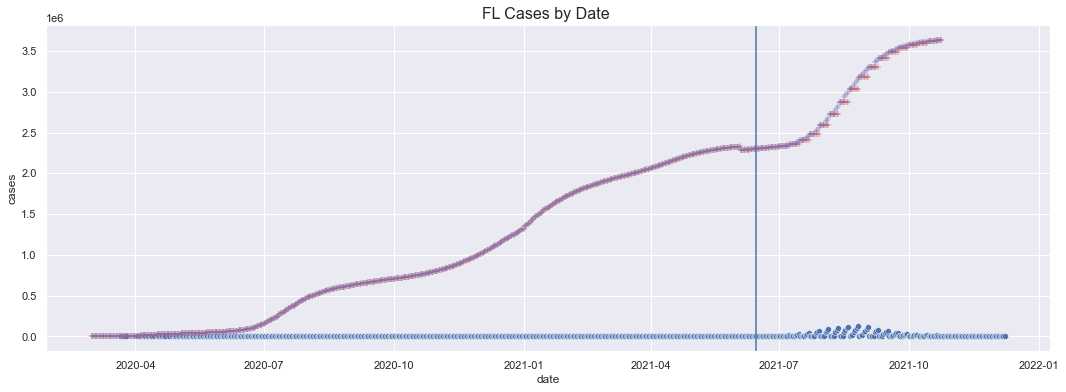

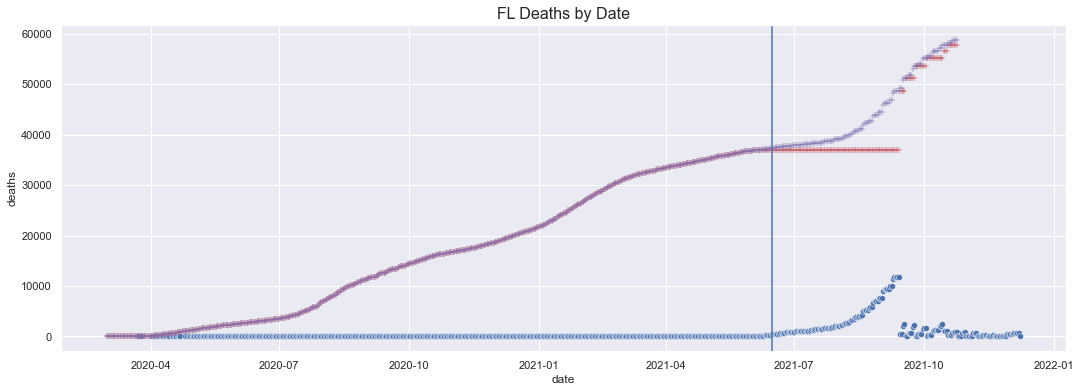

In [42]:
plt.figure(figsize=(18, 6))
sns.scatterplot(x='date', y='cases',data=fl_na_df);
sns.scatterplot(x='date', y='cases', data=state_df[state_df['STATE'] == '12'], marker='+', color='r');
sns.scatterplot(x='date', y='combined_cases', data=fl_projections, marker='+', color='m');
plt.title('FL Cases by Date ', fontsize=16);
plt.axvline(x=datetime.strptime('2021-06-15', '%Y-%m-%d'))
plt.show()
plt.figure(figsize=(18, 6))
sns.scatterplot(x='date', y='deaths',data=fl_na_df);
sns.scatterplot(x='date', y='deaths', data=state_df[state_df['STATE'] == '12'], marker='+', color='r');
sns.scatterplot(x='date', y='combined_deaths', data=fl_projections, marker='+', color='m');
plt.axvline(x=datetime.strptime('2021-06-15', '%Y-%m-%d'))
plt.title('FL Deaths by Date', fontsize=16);
plt.show()